# Lotka-Volterra simulator: joint ratio vs joint score

In [36]:
import numpy as np
import corner
from matplotlib import pyplot as plt
%matplotlib inline
import logging
import matplotlib

from goldmine.simulators.lotka_volterra import LotkaVolterra

logging.basicConfig(format='%(asctime)s  %(message)s', datefmt='%H:%M')
logging.getLogger().setLevel(logging.DEBUG)

## Run simulator and collect log r, t

In [2]:
simulator = LotkaVolterra()
theta0 = simulator.theta_defaults(single_theta=True)[0][0]
print(theta0)

[-4.60517019 -0.69314718  0.         -4.60517019]


In [22]:
n_thetas = 200
n_samples = 1

In [23]:
dthetas = []
log_r_xz = []
t_xz = []

for i_theta in range(n_thetas):
    dtheta = np.zeros(4)
    dtheta = np.exp(- 10. * i_theta / n_thetas) * np.random.randn(4)
    theta1 = theta0 + dtheta
    
    logging.info('\n\n--------------------------------------------------------------------------------\n\n delta theta %s/%s: %s\n\n--------------------------------------------------------------------------------\n', i_theta + 1, n_thetas, dtheta)
    
    x, this_r_xz, this_t_xz = simulator.rvs_ratio_score(theta0, theta1, theta0, theta0, n_samples)
    
    logging.info('\n\nResults: log r = %s, t = %s\n\n', np.log(this_r_xz), this_t_xz)
    
    log_r_xz += list(np.log(this_r_xz))
    t_xz += list(this_t_xz)
    dthetas += [dtheta] * len(this_r_xz)
    
log_r_xz = np.array(log_r_xz)
t_xz = np.array(t_xz)
dthetas = np.array(dthetas)



15:12  

--------------------------------------------------------------------------------

 delta theta 1/200: [-1.21350907  1.12921669 -1.89432426 -1.43584476]

--------------------------------------------------------------------------------

15:12  Simulating 1 evolutions for theta = [-4.60517019 -0.69314718  0.         -4.60517019], augmenting with joint ratio between [-5.81867925  0.43606951 -1.89432426 -6.04101495] and [-4.60517019 -0.69314718  0.         -4.60517019] and joint score at  [-4.60517019 -0.69314718  0.         -4.60517019]
15:12    Starting sample 1 of 1
/Users/johannbrehmer/anaconda3/envs/higgs_inference/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log
15:12  

Results: log r = [-inf], t = [[ 41.62472807  26.36271848  -8.99529997 -29.37527193]]


/Users/johannbrehmer/anaconda3/envs/higgs_inference/lib/python3.6/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in log
15:12  

---

15:14    Starting sample 1 of 1
15:14  

Results: log r = [-341.39943319], t = [[-18.39015169   0.11521438  24.75017312  31.60984831]]


15:14  

--------------------------------------------------------------------------------

 delta theta 12/200: [ 1.67059826  0.12844019  0.46654354 -0.52957547]

--------------------------------------------------------------------------------

15:14  Simulating 1 evolutions for theta = [-4.60517019 -0.69314718  0.         -4.60517019], augmenting with joint ratio between [-2.93457193 -0.56470699  0.46654354 -5.13474565] and [-4.60517019 -0.69314718  0.         -4.60517019] and joint score at  [-4.60517019 -0.69314718  0.         -4.60517019]
15:14    Starting sample 1 of 1
15:14  

Results: log r = [-inf], t = [[  8.09505652 -31.9617446   -7.37940821 -12.90494348]]


15:14  

--------------------------------------------------------------------------------

 delta theta 13/200: [-0.63084797 -0.27246078  0.28785801 -0.39630282]

-----------------------

15:14    Starting sample 1 of 1
15:14  

Results: log r = [-217.01043516], t = [[  0.59499419  27.04027163  11.84665222 -23.40500581]]


15:14  

--------------------------------------------------------------------------------

 delta theta 24/200: [ 0.1462803   0.14806312 -0.22342609 -0.30633048]

--------------------------------------------------------------------------------

15:14  Simulating 1 evolutions for theta = [-4.60517019 -0.69314718  0.         -4.60517019], augmenting with joint ratio between [-4.45888988 -0.54508406 -0.22342609 -4.91150067] and [-4.60517019 -0.69314718  0.         -4.60517019] and joint score at  [-4.60517019 -0.69314718  0.         -4.60517019]
15:14    Starting sample 1 of 1
15:15  

Results: log r = [-146.14770562], t = [[-49.91114038  16.13504316 -42.7203952   20.08885962]]


15:15  

--------------------------------------------------------------------------------

 delta theta 25/200: [ 0.52980567 -0.29197679 -0.08275681 -0.05971163]

--------------

15:15    Starting sample 1 of 1
15:15  

Results: log r = [-88.60031258], t = [[ 16.80713517 -65.97144267  30.02900262  33.80713517]]


15:15  

--------------------------------------------------------------------------------

 delta theta 36/200: [ 0.22682145 -0.21825485 -0.09825444 -0.06309165]

--------------------------------------------------------------------------------

15:15  Simulating 1 evolutions for theta = [-4.60517019 -0.69314718  0.         -4.60517019], augmenting with joint ratio between [-4.37834874 -0.91140203 -0.09825444 -4.66826184] and [-4.60517019 -0.69314718  0.         -4.60517019] and joint score at  [-4.60517019 -0.69314718  0.         -4.60517019]
15:15    Starting sample 1 of 1
15:15  

Results: log r = [-70.6458135], t = [[-60.20469118   9.70668144  17.26596875  31.79530882]]


15:15  

--------------------------------------------------------------------------------

 delta theta 37/200: [ 0.193294    0.02947143 -0.24597084  0.04816585]

-----------------

15:16    Starting sample 1 of 1
15:16  

Results: log r = [-9.75540149], t = [[ 68.93974465  51.20962756 -43.60849383   8.93974465]]


15:16  

--------------------------------------------------------------------------------

 delta theta 48/200: [-0.01418036  0.00155667  0.14492139  0.02834085]

--------------------------------------------------------------------------------

15:16  Simulating 1 evolutions for theta = [-4.60517019 -0.69314718  0.         -4.60517019], augmenting with joint ratio between [-4.61935055 -0.69159051  0.14492139 -4.57682933] and [-4.60517019 -0.69314718  0.         -4.60517019] and joint score at  [-4.60517019 -0.69314718  0.         -4.60517019]
15:16    Starting sample 1 of 1
15:16  

Results: log r = [-5.2236503], t = [[ 5.04709349 22.2626845  36.32126101 -2.95290651]]


15:16  

--------------------------------------------------------------------------------

 delta theta 49/200: [-0.07793084 -0.08155655  0.04168649  0.02759205]

-----------------------

15:17    Starting sample 1 of 1
15:17  

Results: log r = [-15.04027905], t = [[-11.39543198   3.30160844   9.82462105  -8.39543198]]


15:17  

--------------------------------------------------------------------------------

 delta theta 60/200: [-0.0365304   0.02753943 -0.10463624  0.00424766]

--------------------------------------------------------------------------------

15:17  Simulating 1 evolutions for theta = [-4.60517019 -0.69314718  0.         -4.60517019], augmenting with joint ratio between [-4.64170058 -0.66560775 -0.10463624 -4.60092252] and [-4.60517019 -0.69314718  0.         -4.60517019] and joint score at  [-4.60517019 -0.69314718  0.         -4.60517019]
15:17    Starting sample 1 of 1
15:17  

Results: log r = [-2.7398646], t = [[-53.04447777  28.97829458 -46.16630557  49.95552223]]


15:17  

--------------------------------------------------------------------------------

 delta theta 61/200: [ 0.03262801  0.02769471 -0.06596267  0.01234056]

------------------

15:18    Starting sample 1 of 1
15:18  

Results: log r = [-0.98095926], t = [[-38.33239429 -85.36102807   4.46416588 106.66760571]]


15:18  

--------------------------------------------------------------------------------

 delta theta 72/200: [-0.03783185  0.04687123  0.03045264 -0.02463272]

--------------------------------------------------------------------------------

15:18  Simulating 1 evolutions for theta = [-4.60517019 -0.69314718  0.         -4.60517019], augmenting with joint ratio between [-4.64300203 -0.64627595  0.03045264 -4.62980291] and [-4.60517019 -0.69314718  0.         -4.60517019] and joint score at  [-4.60517019 -0.69314718  0.         -4.60517019]
15:18    Starting sample 1 of 1
15:18  

Results: log r = [-4.30580982], t = [[ -2.11126874 -54.49280472  33.81265782  18.88873126]]


15:18  

--------------------------------------------------------------------------------

 delta theta 73/200: [ 0.0255988  -0.00116877 -0.01393383  0.0508356 ]

------------------

15:19    Starting sample 1 of 1
15:19  

Results: log r = [-0.04627554], t = [[  5.22755837 -49.13148927  12.71316488  20.22755837]]


15:19  

--------------------------------------------------------------------------------

 delta theta 84/200: [ 0.01860585 -0.00220554  0.001605    0.01702243]

--------------------------------------------------------------------------------

15:19  Simulating 1 evolutions for theta = [-4.60517019 -0.69314718  0.         -4.60517019], augmenting with joint ratio between [-4.58656434e+00 -6.95352717e-01  1.60499567e-03 -4.58814776e+00] and [-4.60517019 -0.69314718  0.         -4.60517019] and joint score at  [-4.60517019 -0.69314718  0.         -4.60517019]
15:19    Starting sample 1 of 1
15:19  

Results: log r = [0.00144016], t = [[ -1.26968927  -4.46683098 -46.44389607  24.73031073]]


15:19  

--------------------------------------------------------------------------------

 delta theta 85/200: [ 0.01870016  0.02365041  0.00277167 -0.00109177]

---

15:21  

Results: log r = [0.08345548], t = [[ 30.89106544  40.78737625   3.10572258 -45.10893456]]


15:21  

--------------------------------------------------------------------------------

 delta theta 95/200: [ 0.00736262  0.00630081 -0.00946946  0.00509387]

--------------------------------------------------------------------------------

15:21  Simulating 1 evolutions for theta = [-4.60517019 -0.69314718  0.         -4.60517019], augmenting with joint ratio between [-4.59780756 -0.68684637 -0.00946946 -4.60007632] and [-4.60517019 -0.69314718  0.         -4.60517019] and joint score at  [-4.60517019 -0.69314718  0.         -4.60517019]
15:21    Starting sample 1 of 1
15:21  

Results: log r = [-0.20125678], t = [[18.42178039  5.18716237 58.47000053 67.42178039]]


15:21  

--------------------------------------------------------------------------------

 delta theta 96/200: [ 0.00434689 -0.00217382  0.01547968  0.01049347]

-------------------------------------------------------

15:21    Starting sample 1 of 1
15:21  

Results: log r = [0.21969782], t = [[ -6.99161271  39.66793335 -17.85784318   7.00838729]]


15:21  

--------------------------------------------------------------------------------

 delta theta 107/200: [-0.00454189 -0.00240686  0.00053557 -0.00404472]

--------------------------------------------------------------------------------

15:21  Simulating 1 evolutions for theta = [-4.60517019 -0.69314718  0.         -4.60517019], augmenting with joint ratio between [-4.60971208e+00 -6.95554039e-01  5.35572966e-04 -4.60921491e+00] and [-4.60517019 -0.69314718  0.         -4.60517019] and joint score at  [-4.60517019 -0.69314718  0.         -4.60517019]
15:21    Starting sample 1 of 1
15:22  

Results: log r = [0.3720611], t = [[-12.32713136 -36.35966738  19.61415565 -63.32713136]]


15:22  

--------------------------------------------------------------------------------

 delta theta 108/200: [-2.74645051e-05 -2.32704995e-03  9.42865153e-03 -2.06

15:23    Starting sample 1 of 1
15:23  

Results: log r = [-0.34596492], t = [[ 17.84739127 -25.28214209  11.17193644  18.84739127]]


15:23  

--------------------------------------------------------------------------------

 delta theta 119/200: [ 0.0024798   0.00013163 -0.00016411 -0.00108765]

--------------------------------------------------------------------------------

15:23  Simulating 1 evolutions for theta = [-4.60517019 -0.69314718  0.         -4.60517019], augmenting with joint ratio between [-4.60269038e+00 -6.93015551e-01 -1.64109643e-04 -4.60625784e+00] and [-4.60517019 -0.69314718  0.         -4.60517019] and joint score at  [-4.60517019 -0.69314718  0.         -4.60517019]
15:23    Starting sample 1 of 1
15:23  

Results: log r = [0.02804199], t = [[ 8.17169137 17.78441981 15.56508695 -8.82830863]]


15:23  

--------------------------------------------------------------------------------

 delta theta 120/200: [-0.00294649 -0.00017602 -0.0010518  -0.00123003]

-----

15:24    Starting sample 1 of 1
15:24  

Results: log r = [0.01471166], t = [[-13.02505784  -4.93104496 -35.1733232   -1.02505784]]


15:24  

--------------------------------------------------------------------------------

 delta theta 131/200: [-0.00276749  0.00040252 -0.00203207  0.00069528]

--------------------------------------------------------------------------------

15:24  Simulating 1 evolutions for theta = [-4.60517019 -0.69314718  0.         -4.60517019], augmenting with joint ratio between [-4.60793768e+00 -6.92744659e-01 -2.03207287e-03 -4.60447491e+00] and [-4.60517019 -0.69314718  0.         -4.60517019] and joint score at  [-4.60517019 -0.69314718  0.         -4.60517019]
15:24    Starting sample 1 of 1
15:24  

Results: log r = [-0.05080845], t = [[  5.53403782 -29.24120048  22.48722665  45.53403782]]


15:24  

--------------------------------------------------------------------------------

 delta theta 132/200: [ 0.00129747 -0.00277957  0.0021762  -0.00072853]

-

15:25    Starting sample 1 of 1
15:25  

Results: log r = [-0.07332005], t = [[ 23.60596881  40.18890469   2.60137698 -24.39403119]]


15:25  

--------------------------------------------------------------------------------

 delta theta 143/200: [-1.02282925e-04 -9.16898424e-04  8.82268863e-05  6.28951298e-04]

--------------------------------------------------------------------------------

15:25  Simulating 1 evolutions for theta = [-4.60517019 -0.69314718  0.         -4.60517019], augmenting with joint ratio between [-4.60527247e+00 -6.94064079e-01  8.82268863e-05 -4.60454123e+00] and [-4.60517019 -0.69314718  0.         -4.60517019] and joint score at  [-4.60517019 -0.69314718  0.         -4.60517019]
15:25    Starting sample 1 of 1
15:25  

Results: log r = [-0.10471161], t = [[ 39.26490368  85.9908647   19.99276556 -35.73509632]]


15:25  

--------------------------------------------------------------------------------

 delta theta 144/200: [-0.00105678 -0.00031335 -0.0010495

15:26    Starting sample 1 of 1
15:26  

Results: log r = [-0.01645126], t = [[  4.76515416 -14.0787946  -55.71124683  -9.23484584]]


15:26  

--------------------------------------------------------------------------------

 delta theta 155/200: [ 7.06162357e-04 -5.70269600e-05  2.26436482e-04 -3.06455686e-04]

--------------------------------------------------------------------------------

15:26  Simulating 1 evolutions for theta = [-4.60517019 -0.69314718  0.         -4.60517019], augmenting with joint ratio between [-4.60446402e+00 -6.93204208e-01  2.26436482e-04 -4.60547664e+00] and [-4.60517019 -0.69314718  0.         -4.60517019] and joint score at  [-4.60517019 -0.69314718  0.         -4.60517019]
15:26    Starting sample 1 of 1
15:26  

Results: log r = [0.00487383], t = [[-11.88546748  25.74968459  -6.83769775 -54.88546748]]


15:26  

--------------------------------------------------------------------------------

 delta theta 156/200: [ 2.59135984e-04 -8.96685594e-05 -2.

15:26  Simulating 1 evolutions for theta = [-4.60517019 -0.69314718  0.         -4.60517019], augmenting with joint ratio between [-4.60538604e+00 -6.93165761e-01  2.19658106e-04 -4.60478260e+00] and [-4.60517019 -0.69314718  0.         -4.60517019] and joint score at  [-4.60517019 -0.69314718  0.         -4.60517019]
15:26    Starting sample 1 of 1
15:26  

Results: log r = [0.00272454], t = [[-31.93326842 -23.4018806   43.32207449 -35.93326842]]


15:26  

--------------------------------------------------------------------------------

 delta theta 167/200: [-3.16488492e-04 -2.23628373e-05  2.23276245e-04  2.54346246e-04]

--------------------------------------------------------------------------------

15:26  Simulating 1 evolutions for theta = [-4.60517019 -0.69314718  0.         -4.60517019], augmenting with joint ratio between [-4.60548667e+00 -6.93169543e-01  2.23276245e-04 -4.60491584e+00] and [-4.60517019 -0.69314718  0.         -4.60517019] and joint score at  [-4.60517019 -

15:27    Starting sample 1 of 1
15:27  

Results: log r = [-0.00272478], t = [[27.33599772 57.39923717 65.04711434  0.33599772]]


15:27  

--------------------------------------------------------------------------------

 delta theta 178/200: [-5.25132204e-06 -1.30558296e-04 -9.12200663e-06 -1.14677317e-04]

--------------------------------------------------------------------------------

15:27  Simulating 1 evolutions for theta = [-4.60517019 -0.69314718  0.         -4.60517019], augmenting with joint ratio between [-4.60517544e+00 -6.93277739e-01 -9.12200663e-06 -4.60528486e+00] and [-4.60517019 -0.69314718  0.         -4.60517019] and joint score at  [-4.60517019 -0.69314718  0.         -4.60517019]
15:27    Starting sample 1 of 1
15:27  

Results: log r = [0.00610927], t = [[-34.11626923  -9.42868068  49.2275614  -45.11626923]]


15:27  

--------------------------------------------------------------------------------

 delta theta 179/200: [-7.70751984e-05  1.99747375e-04  1.7728

15:28  Simulating 1 evolutions for theta = [-4.60517019 -0.69314718  0.         -4.60517019], augmenting with joint ratio between [-4.60527223e+00 -6.93236200e-01  2.89986063e-05 -4.60515466e+00] and [-4.60517019 -0.69314718  0.         -4.60517019] and joint score at  [-4.60517019 -0.69314718  0.         -4.60517019]
15:28    Starting sample 1 of 1
15:28  

Results: log r = [0.00785355], t = [[-92.16486942   7.68603139 -47.49530112  33.83513058]]


15:28  

--------------------------------------------------------------------------------

 delta theta 190/200: [ 1.60869308e-04  5.70172679e-05 -1.31916453e-04 -6.60798389e-05]

--------------------------------------------------------------------------------

15:28  Simulating 1 evolutions for theta = [-4.60517019 -0.69314718  0.         -4.60517019], augmenting with joint ratio between [-4.60500932e+00 -6.93090163e-01 -1.31916453e-04 -4.60523627e+00] and [-4.60517019 -0.69314718  0.         -4.60517019] and joint score at  [-4.60517019 -

15:29  

Results: log r = [0.00055797], t = [[-26.82421812 -50.10917537  34.65901912  17.17578188]]




In [26]:
dtheta_t_xz = np.diag( dthetas.dot(t_xz.T) )
dtheta_abs = np.linalg.norm(dthetas, axis=1)

## Plot delta theta * score vs log r

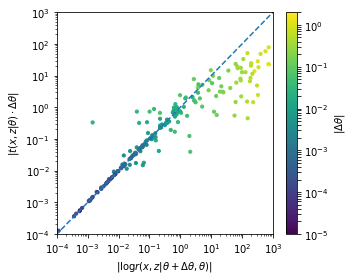

In [45]:
fig = plt.figure(figsize=(5,4))
ax = plt.gca()

plt.plot([0.,1000.],[0.,1000.], ls='--', lw=1.5)
sc = plt.scatter(np.abs(log_r_xz), np.abs(dtheta_t_xz),
            c=dtheta_abs, cmap='viridis', norm=matplotlib.colors.LogNorm(vmin=0.00001, vmax=2.),
            s=10.)

cbar = plt.colorbar(sc)

plt.xlabel(r'$|\log r(x,z|\theta + \Delta \theta, \theta)|$')
plt.ylabel(r'$|t(x,z|\theta) \cdot \Delta \theta|$')
plt.xlim(0.0001,1000.)
plt.ylim(0.0001,1000.)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
cbar.set_label(r'$|\Delta \theta|$')

plt.tight_layout()
plt.savefig('lv_local_model_breakdown.pdf')